# Sentiment Clasification Twitter 

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import pickle
import keras
import tensorflow as tf
# from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
# Prepare data 
def prepareData(dirpath):
    readData = pd.read_csv(dirpath,sep='\t',error_bad_lines=False)
    return(readData)

In [3]:
# read data to dataframe
df = prepareData('dataset-idsa-master/Indonesian Sentiment Twitter Dataset Labeled.csv')

In [4]:
#shape dataframe
df.shape

(10806, 2)

In [5]:
#dataframe head
df.head()

,sentimen,Tweet
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...
2,1,doa rezeki tak putus inna haa zaa larizquna ma...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...
4,-1,aku tak faham betul jenis orang malaysia yang ...


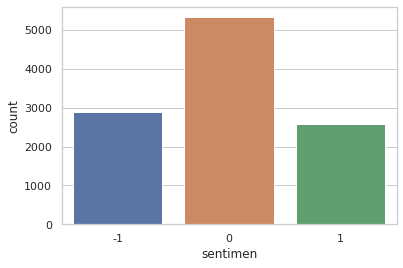

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.countplot(x="sentimen", data=df)

In [10]:
df.sentimen.unique()

array([-1,  1,  0])

In [16]:
from sklearn.utils import resample
a = resample(df.sentimen, n_samples=2, replace=False, stratify=df.sentimen,random_state=0)

In [17]:
a

7515    0
2270   -1
Name: sentimen, dtype: int64

In [6]:
#split dataframe to input(X) and output (y)
X = df['Tweet'].values
y = df['sentimen'].values

class_label = [1,0,-1]

In [7]:
#spliting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
#shape data after spliting
print("Shape of Data Train: {}".format(X_train.shape))
print("Shape of Data Test : {}".format(X_test.shape))

Shape of Data Train: (7240,)
Shape of Data Test : (3566,)


In [9]:
#select Data Train index 0
type(X_train)

numpy.ndarray

In [10]:
#select Data Train label index 0
y_train[0]

0

In [11]:
# vectorize sentence
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X_train)
# vectorizer.vocabulary_

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [12]:
# tokenizer
tokenizer = Tokenizer(num_words = 400)
tokenizer.fit_on_texts(X_train)

#save tokenizer using pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


# X_train_tokenize = tokenizer.fit_on_texts(X_train)
# X_test_tokenize = tokenizer.fit_on_texts(X_test)
# X_train_token = tokenizer.fit_on_texts(X_train)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
# y_train_tokens = tokenizer.texts_to_sequences(y_test)
# print(X_train_tokenize)
print(X_train_tokens)

[[40, 142, 103, 8, 195, 52, 34, 328, 382, 40, 142], [98, 1, 44, 8, 106, 3, 12, 66, 8, 106, 242, 19], [329, 1, 321, 79, 182], [150, 373, 24, 3, 5, 308, 7, 250, 67], [2, 23, 15, 243, 34, 7], [1, 223, 8, 150, 267, 15], [116, 24, 120, 268, 393, 14, 269, 18, 120, 28, 3, 66, 29, 101, 148], [330, 251, 5, 207, 207], [26, 1, 24, 20, 188, 40, 25], [14, 343, 14, 39, 213, 14, 214, 33, 213, 66, 383, 214, 33, 111, 9, 344], [3, 43, 2, 394, 121], [137, 42, 74, 229, 236, 5, 237, 353, 107, 74, 107], [51, 91, 69, 48, 14, 50, 31, 80, 55, 167, 18, 111, 13, 160], [150, 119, 277, 117, 6, 24], [230, 5, 394], [70, 5, 170], [278], [252, 1, 101, 1, 3, 331, 90, 269, 13, 291, 13, 244, 124, 218], [22, 9, 18, 237, 1, 51, 49, 1, 51, 237, 112, 1, 157, 31, 31, 9], [15, 1], [10, 253, 151, 11, 231, 1, 345], [40, 54, 11], [13, 76, 30], [51, 329, 127, 1, 59, 292, 2, 20, 384, 7, 15, 40, 321], [268, 268, 78], [1, 41], [4, 13, 332, 76, 138, 62, 57], [35, 45, 238, 21, 175, 3, 37, 82, 5, 27], [71, 31, 45, 45, 58, 33, 1, 25, 226

In [13]:
# cek using print
print (X_train[0])
# print(X_train_tokenize)
print(X_train_tokens[0])

Kalo gue sih gk ada kriteria khusus utk suka sama seseorang btw kalo gue 
[40, 142, 103, 8, 195, 52, 34, 328, 382, 40, 142]


In [14]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

def sequence_to_text(list_of_indices):
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)
# X_train_tokens[0]
# X_train[0]

In [15]:
print(sequence_to_text(X_train_tokens[0]))

['kalo', 'gue', 'sih', 'ada', 'utk', 'suka', 'sama', 'seseorang', 'btw', 'kalo', 'gue']


In [16]:
print('Maximum review length: {}'.format(
len(max(X_train_tokens, key=len))))

print('Minimum review length: {}'.format(
len(min(X_train_tokens, key=len))))

Maximum review length: 23
Minimum review length: 0


In [17]:
# X_train_tokens = pad_sequences(X_train_tokens, maxlen=100, padding='pre', truncating='pre')

In [18]:
X_train_tokens_post = pad_sequences(X_train_tokens, maxlen=100, padding='post')
#X_train_tokens[0]

In [19]:
X_train_tokens_post

array([[ 40, 142, 103, ...,   0,   0,   0],
       [ 98,   1,  44, ...,   0,   0,   0],
       [329,   1, 321, ...,   0,   0,   0],
       ...,
       [ 61,   4, 126, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [270, 319,  27, ...,   0,   0,   0]], dtype=int32)

In [20]:
X_train_tokens_pre = pad_sequences(X_train_tokens, maxlen=100, padding='pre')
#X_train_tokens[0]

In [21]:
X_train_tokens_pre

array([[  0,   0,   0, ..., 382,  40, 142],
       [  0,   0,   0, ..., 106, 242,  19],
       [  0,   0,   0, ..., 321,  79, 182],
       ...,
       [  0,   0,   0, ..., 253,  47,  19],
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ..., 270, 319,  27]], dtype=int32)

In [22]:
X_train_tokens_post

array([[ 40, 142, 103, ...,   0,   0,   0],
       [ 98,   1,  44, ...,   0,   0,   0],
       [329,   1, 321, ...,   0,   0,   0],
       ...,
       [ 61,   4, 126, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [270, 319,  27, ...,   0,   0,   0]], dtype=int32)

In [23]:
print(X_train_tokens[0])
print(X_train[0])
print(y_train)

[40, 142, 103, 8, 195, 52, 34, 328, 382, 40, 142]
Kalo gue sih gk ada kriteria khusus utk suka sama seseorang btw kalo gue 
[ 0  0  1 ...  0 -1  1]


In [24]:
def one_hot_encoder(y):
  label = np.zeros([len(y), len(class_label)])
  for i in range(len(y)):
      label[i][class_label.index(y[i])] = 1
  return label

In [25]:
y_trainOH = one_hot_encoder(list(y_train))

In [26]:
print('creating the model...')
model = Sequential()
max_tokens = 100
embedding_size = 250
num_words = 1000
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='Embedding_layer'))
model.add(LSTM(units=16, dropout=0.25, name='LSTM_layer'))
# model.add(Dense(10,activation='softmax', name='hidden1_layer'))
# model.add(Dense(5, activation='softmax', name='hidden2_layer'))
model.add(Dense(3, activation='softmax', name='Output_layer'))
optimizer = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
y_train_model = np.array(y_trainOH)
print('model has been created')

creating the model...
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
model has been created


In [27]:
print('model created with summary')
model.summary()

model created with summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding_layer (Embedding)  (None, 100, 250)          250000    
_________________________________________________________________
LSTM_layer (LSTM)            (None, 16)                17088     
_________________________________________________________________
Output_layer (Dense)         (None, 3)                 51        
Total params: 267,139
Trainable params: 267,139
Non-trainable params: 0
_________________________________________________________________


In [28]:
type(y_train_model)

numpy.ndarray

In [29]:
X_train_tokens_post

array([[ 40, 142, 103, ...,   0,   0,   0],
       [ 98,   1,  44, ...,   0,   0,   0],
       [329,   1, 321, ...,   0,   0,   0],
       ...,
       [ 61,   4, 126, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [270, 319,  27, ...,   0,   0,   0]], dtype=int32)

In [34]:
print('train the model...')
model.fit(X_train_tokens_pre,y_train_model,epochs=5,validation_split=0.2, workers=8,verbose=1)
print('training done')

train the model...
Train on 5792 samples, validate on 1448 samples
Epoch 1/5
5792/5792 [==============================] - 16s 3ms/sample - loss: 0.4205 - acc: 0.8060 - val_loss: 0.6504 - val_acc: 0.6913
Epoch 2/5
5792/5792 [==============================] - 15s 3ms/sample - loss: 0.4107 - acc: 0.8115 - val_loss: 0.6702 - val_acc: 0.6922
Epoch 3/5
5792/5792 [==============================] - 16s 3ms/sample - loss: 0.3957 - acc: 0.8173 - val_loss: 0.6782 - val_acc: 0.6936
Epoch 4/5
5792/5792 [==============================] - 16s 3ms/sample - loss: 0.3833 - acc: 0.8272 - val_loss: 0.7034 - val_acc: 0.6954
Epoch 5/5
5792/5792 [==============================] - 16s 3ms/sample - loss: 0.3740 - acc: 0.8295 - val_loss: 0.7061 - val_acc: 0.6950
training done


In [31]:
X_test[0]

'fi loh ada jungkook co jarang muncul jadi jarang ngobrol ngobrol dong '

In [32]:
y_test[0]

0

In [33]:
model.save('sentiment.h5')

In [82]:
from numpy import loadtxt
from tensorflow.keras.models import load_model

#load model 
test = load_model('sentiment.h5')

In [ ]:
# model.predict('WOW kok ini keren banget asli awesome')

In [83]:
type(test)

tensorflow.python.keras.engine.sequential.Sequential

In [84]:
test.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding_layer (Embedding)  (None, 100, 250)          250000    
_________________________________________________________________
LSTM_layer (LSTM)            (None, 16)                17088     
_________________________________________________________________
hidden1_layer (Dense)        (None, 10)                170       
_________________________________________________________________
Output_layer (Dense)         (None, 3)                 33        
Total params: 267,291
Trainable params: 267,291
Non-trainable params: 0
_________________________________________________________________


In [95]:
sentence= ''

#load tokenizer pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
    
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=50, padding='pre', truncating='pre') 
sentence.shape


class_label[int(test.predict_classes(sentence))]
# test.predict_classes(sentence)
# model.predict_classes(sentence)
# model.predict(sentence[0:1])

0

In [ ]:
pip install tensorflow-gpu==1.15

In [ ]:
pip freeze |grep tensor

In [ ]:
word_index = tokenizer.word_index
word_index

In [ ]:
tf.test.is_gpu_available()

In [ ]:
tf.test.is_built_with_gpu_support()

In [ ]:
y